In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [3]:
df_train.shape # 60,000 training records

(60000, 785)

In [4]:
28 * 28

784

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
X_train = df_train.iloc[:, 1:].values/255.0
X_test = df_test.iloc[:, 1:].values/255.0

y_train = df_train.iloc[:, 0]
y_test = df_test.iloc[:, 0]

In [25]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [26]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

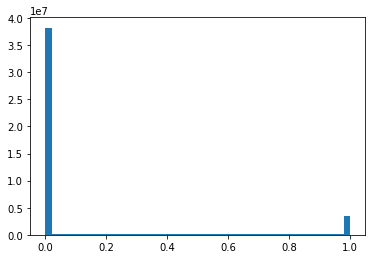

In [27]:
plt.hist(X_train.flatten(), bins = 50);

In [29]:
np.sum(X_train == 0) / np.product(X_train.shape)

0.8087977040816327

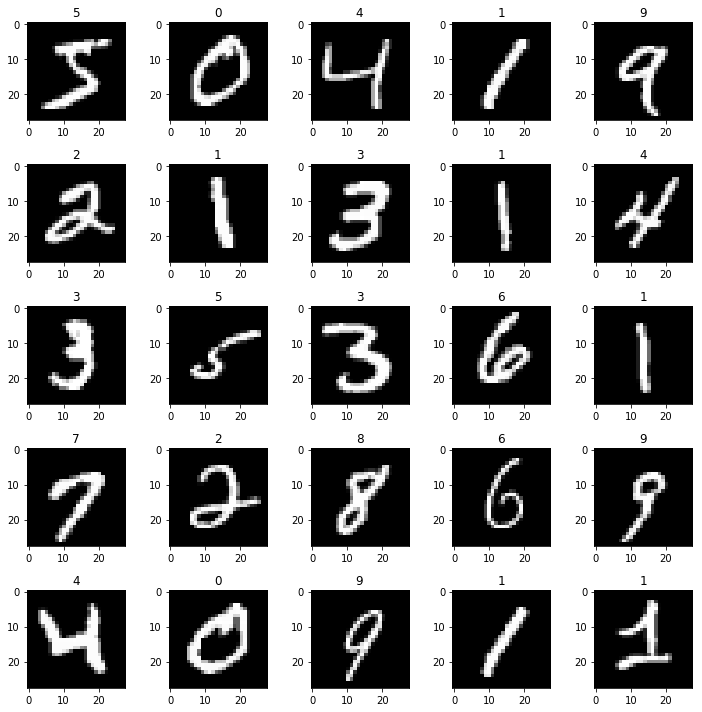

In [38]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap="gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

In [45]:
from sklearn import linear_model, metrics

In [51]:
%%time 

est = linear_model.SGDClassifier(loss="log"
                                 , n_jobs = 8
                                 , alpha=0.01
                                 , max_iter=1000
                                 , random_state = 1
                                 , tol = 1e-5
                                 , eta0 = 0.15
                                 , learning_rate="invscaling")

est.fit(X_train, y_train)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

CPU times: user 1min 34s, sys: 196 ms, total: 1min 34s
Wall time: 17.3 s


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [53]:
print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("tes accuracy:", metrics.accuracy_score(y_test, y_test_pred))

training accuracy: 0.8915333333333333
tes accuracy: 0.8988


In [57]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: 0, dtype: int64

In [58]:
est.coef_.shape

(10, 784)

In [59]:
import tensorflow as tf

In [63]:
x = tf.constant(2.5)
w = tf.constant(10.0)
z = x * w
print("x", x)
print("w", w)
print("z", z)

with tf.Session() as sess:
    print(sess.run(z))

x Tensor("Const_6:0", shape=(), dtype=float32)
w Tensor("Const_7:0", shape=(), dtype=float32)
z Tensor("mul_2:0", shape=(), dtype=float32)
25.0


In [87]:
tf.reset_default_graph()

x_ = np.array([
    [2, 3, 4],
    [1, 2, 3], 
    [-1, 0, 1]
]).astype("int32")
    
w_ = np.array([[1, 2, 3]]).astype("int32")

x = tf.constant(x_, name = "x")
w = tf.constant(w_, name = "w")
print("x", x)
print("w", w)
z = tf.matmul(w, x)


print("z", z)
print("z1", w1)

with tf.Session() as sess:
    print(sess.run(z))

x Tensor("x:0", shape=(3, 3), dtype=int32)
w Tensor("w:0", shape=(1, 3), dtype=int32)
z Tensor("MatMul:0", shape=(1, 3), dtype=int32)
z1 Tensor("w_1:0", shape=(3,), dtype=int64)
[[ 1  7 13]]


In [89]:
np.dot(w_, x_)

array([[ 1,  7, 13]], dtype=int32)

In [83]:
x_.dtype, w_.dtype

(dtype('int64'), dtype('int64'))

In [90]:
tf.reset_default_graph()

x_ = np.array([
    [2, 3, 4],
    [1, 2, 3], 
    [-1, 0, 1]
]).astype("int32")
    
w_ = np.array([[1, 2, 3]]).astype("int32")
# -----------------------------------
x = tf.placeholder(dtype="int32", shape=[3, 3, 3], name = "x")
w = tf.placeholder(dtype="int32", shape=[1, 3], name = "w")
print("x", x)
print("w", w)
z = tf.matmul(w, x)
print("z", z)
# -----------------------------------

with tf.Session() as sess:
    values = {x: x_, w: w_}
    print(sess.run(z, feed_dict=values))

x Tensor("x:0", shape=(3, 3), dtype=int32)
w Tensor("w:0", shape=(1, 3), dtype=int32)
z Tensor("MatMul:0", shape=(1, 3), dtype=int32)
z1 Tensor("w_1:0", shape=(3,), dtype=int64)
[[ 1  7 13]]


In [144]:
n_classes = 10 # Number of classes in the outcome variables
n_x = 784 # Number of feature in the input


X = tf.placeholder("float32", shape=(None, n_x)) # Placeholder for input feature
y = tf.placeholder("int32", shape=(None)) # Placeholder for outcome variable

# Shape: shape of the input
# None in shape indicate unknown number of records. 
# Note, during the inferencing, we would send arbitrary number of records

print("X", X)
print("y", y)

# Performing one hot encoding for the outcome variable
# The one hot encoded values are required by softmax-entropy calculation
y_oh = tf.one_hot(y, depth=n_classes)
print("y_oh", y_oh)

# W and b are parameters that we ultimately like to estimate. So these are defined as variable
# TF optimizer will optimize their value unless you make them non trainable.
W = tf.Variable(tf.random_normal(shape = (n_x, n_classes)
                                 , stddev= np.sqrt (2/n_x)))
b = tf.Variable(tf.zeros(shape = [n_classes]))

# Net input function for output layer
z = tf.matmul(X, W) + b

#z = tf.layers.Dense(10, activation=None)(X)


print("W", W)
print("b", b)
print("z", z)

# Compute probabilities by applying softmax activation function on Z
y_prob = tf.nn.softmax(z)
print("y_prob", y_prob)

# Class prediction 
# We can looking row wise (that is one row for each record) and see what index has the max value
y_pred = tf.argmax(z, axis=1, output_type="int32")
print("y_pred", y_pred)

# Are the predicted label and true label (y) match?
match = tf.equal(y, y_pred)
print("match", match)

# Calculate accuracy by taking avg across all records
accuracy = tf.reduce_mean(tf.cast(match, "float"))

# Softmax cross entropy loss
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=z)

# Cost function ... aggregation of cross entropy loss
cost = tf.reduce_mean(loss) # == J

# Tensorflow optimizers that perform backpropagation
# Each time this optimizer are invoked using session.run, it refines the values of parameters W, b
op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
print("cost", cost)


# Creating a tensorflow session
with tf.Session() as sess:
    costs_ = [] # placeholder to hold all cost_ collected during DG iterations
    
    # Iniatialize variables W, b as defined above
    sess.run(tf.global_variables_initializer())
    
    values = {X: X_train, y: y_train}
    for i in range(10):
        # Run the GD iteration, here we are iterating 10 times
        accuracy_, cost_, op_ = sess.run([accuracy, cost, op], feed_dict=values)
        print("accuracy: %f, cost: %f" % (accuracy_, cost_))
        costs_.append(cost_)
        
    # Evauting the performance on the test data
    values = {X: X_test, y:y_test}
    test_accuracy, y_prob_, y_pred_ = sess.run([accuracy, y_prob, y_pred], feed_dict=values)
    print("test_accuracy", test_accuracy)


X Tensor("Placeholder_68:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_69:0", dtype=int32)
y_oh Tensor("one_hot_17:0", dtype=float32)
W <tf.Variable 'Variable_31:0' shape=(784, 10) dtype=float32_ref>
b <tf.Variable 'Variable_32:0' shape=(10,) dtype=float32_ref>
z Tensor("dense/BiasAdd:0", shape=(?, 10), dtype=float32)
y_prob Tensor("Softmax_9:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax_27:0", shape=(?,), dtype=int32)
match Tensor("Equal_22:0", dtype=bool)
cost Tensor("Mean_35:0", shape=(), dtype=float32)
accuracy: 0.107900, cost: 2.352989
accuracy: 0.362083, cost: 1.925189
accuracy: 0.566600, cost: 1.602887
accuracy: 0.687933, cost: 1.329841
accuracy: 0.753967, cost: 1.125412
accuracy: 0.779317, cost: 0.982046
accuracy: 0.792800, cost: 0.873538
accuracy: 0.806467, cost: 0.785277
accuracy: 0.813450, cost: 0.717079
accuracy: 0.818250, cost: 0.666503
test_accuracy 0.8345


In [129]:
pd.DataFrame(y_prob_).head()

,0,1,2,3,4,5,6,7,8,9
0,0.002005,0.000328,0.001902,0.003910,0.004342,0.001369,0.000773,0.940487,0.005124,0.039759
1,0.005042,0.015483,0.678472,0.060381,0.000290,0.049408,0.089388,0.000328,0.101046,0.000163
2,0.014465,0.760442,0.036513,0.031724,0.011799,0.015165,0.021795,0.014867,0.084148,0.009083
3,0.827045,0.000485,0.017118,0.006646,0.004522,0.039206,0.062647,0.020249,0.013912,0.008172
4,0.025012,0.000122,0.019208,0.011000,0.639939,0.009703,0.069574,0.033874,0.107706,0.083862


In [131]:
print(y_pred_[:10])

[7 2 1 0 4 1 4 9 4 9]


In [118]:
a = tf.constant(np.array([
    [0.2, 0.3, 0.4,0.0],
    [0.1, 0.5, 0.4,0.9]
]))

b = tf.argmax(a, axis = 1)

with tf.Session() as sess:
    b_ = sess.run(b)
    print(b_)


[2 3]


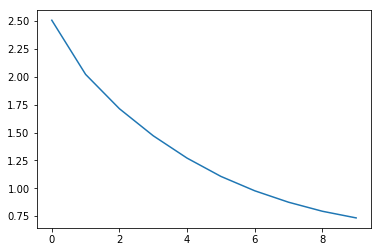

In [142]:
pd.Series(costs_).plot()

In [151]:
np.random.seed(1)
a = np.random.random((10, 3))
b = np.random.random((3, 5))
# Task: implement the following dot product using tensorflow
np.dot(a, b)

array([[0.26839953, 0.67020015, 1.0006944 , 0.23560542, 0.82888711],
       [0.16734727, 0.29714717, 0.43798324, 0.23675809, 0.32879683],
       [0.51969583, 0.61251115, 0.57810161, 0.41878755, 0.42904631],
       [0.86284024, 1.02733495, 1.0581631 , 0.83577431, 0.75798382],
       [0.32424953, 0.70941529, 0.93642271, 0.14668256, 0.80299775],
       [0.75007118, 0.98681166, 1.14720832, 0.80606412, 0.83459127],
       [0.86813587, 0.79420445, 0.52437977, 0.71048351, 0.32839288],
       [0.87872658, 1.14088032, 1.38323721, 1.06841138, 0.97649709],
       [0.4525494 , 1.04682962, 1.60999582, 0.55074472, 1.28621647],
       [0.92578602, 0.79003107, 0.42542479, 0.71702829, 0.24506558]])

In [154]:
x = tf.placeholder("float32", (10, 3))
y = tf.placeholder("float32", (3, 5))
z = tf.matmul(x, y)

with tf.Session() as sess:
    z_= sess.run(z, feed_dict={x: a, y: b})
    print(z_)

[[0.26839954 0.67020017 1.0006944  0.2356054  0.8288871 ]
 [0.16734727 0.29714715 0.43798324 0.23675808 0.32879683]
 [0.5196958  0.61251116 0.57810163 0.41878754 0.42904633]
 [0.8628403  1.0273349  1.0581632  0.8357743  0.7579838 ]
 [0.32424957 0.7094153  0.93642277 0.14668255 0.8029977 ]
 [0.75007117 0.98681164 1.1472083  0.8060641  0.83459127]
 [0.8681359  0.7942045  0.5243798  0.71048355 0.3283929 ]
 [0.8787266  1.1408803  1.3832372  1.0684114  0.9764972 ]
 [0.4525494  1.0468296  1.6099957  0.5507447  1.2862165 ]
 [0.925786   0.7900311  0.4254248  0.7170283  0.24506557]]


In [165]:
epochs = 3 # Epoch is one full pass over the entire training set 
batch_size = 128 # Per batch how many records we want to take

dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
dataset = dataset.shuffle(buffer_size=X_train.shape[0]) #buffer_size: number of records
dataset = dataset.batch(batch_size) 
dataset = dataset.repeat(epochs)
iterator = dataset.make_one_shot_iterator()

In [166]:
n_classes = 10 # Number of classes in the outcome variables
n_x = 784 # Number of feature in the input
n_h1 = 400
n_h2 = 100


X = tf.placeholder("float32", shape=(None, n_x)) # Placeholder for input feature
y = tf.placeholder("int32", shape=(None)) # Placeholder for outcome variable

# Shape: shape of the input
# None in shape indicate unknown number of records. 
# Note, during the inferencing, we would send arbitrary number of records

print("X", X)
print("y", y)

# Performing one hot encoding for the outcome variable
# The one hot encoded values are required by softmax-entropy calculation
y_oh = tf.one_hot(y, depth=n_classes)
print("y_oh", y_oh)


A1 = tf.layers.Dense(n_h1, activation="relu")(X)
A2 = tf.layers.Dense(n_h2, activation="relu")(A1)

z = tf.layers.Dense(n_classes, activation=None)(A2)



# Compute probabilities by applying softmax activation function on Z
y_prob = tf.nn.softmax(z)
print("y_prob", y_prob)

# Class prediction 
# We can looking row wise (that is one row for each record) 
# and see what index has the max value
y_pred = tf.argmax(z, axis=1, output_type="int32")
print("y_pred", y_pred)

# Are the predicted label and true label (y) match?
match = tf.equal(y, y_pred)
print("match", match)

# Calculate accuracy by taking avg across all records
accuracy = tf.reduce_mean(tf.cast(match, "float"))

# Softmax cross entropy loss
loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits=z)

# Cost function ... aggregation of cross entropy loss
cost = tf.reduce_mean(loss) # == J

# Tensorflow optimizers that perform backpropagation
# Each time this optimizer are invoked using session.run, it refines the values of parameters W, b
op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
print("cost", cost)


# Creating a tensorflow session
with tf.Session() as sess:
    costs_ = [] # placeholder to hold all cost_ collected during DG iterations
    
    # Iniatialize variables W, b as defined above
    sess.run(tf.global_variables_initializer())
    
    while True:
        try:
            X_batch, y_batch = sess.run(iterator.get_next())

            values = {X: X_batch, y: y_batch}
            accuracy_, cost_, op_ = sess.run([accuracy, cost, op]
                                             , feed_dict=values)
            print("accuracy: %.4f, cost: %.4f" % (accuracy_, cost_)
                  )
            costs_.append(cost_)
        except tf.errors.OutOfRangeError:
            break
        
    # Evauting the performance on the test data
    values = {X: X_test, y:y_test}
    test_accuracy, y_prob_, y_pred_ = sess.run([accuracy, y_prob, y_pred]
                                    , feed_dict=values)
    print("test_accuracy", test_accuracy)


X Tensor("Placeholder_90:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_91:0", dtype=int32)
y_oh Tensor("one_hot_25:0", dtype=float32)
y_prob Tensor("Softmax_15:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax_33:0", shape=(?,), dtype=int32)
match Tensor("Equal_28:0", dtype=bool)
cost Tensor("Mean_47:0", shape=(), dtype=float32)


KeyboardInterrupt: 

In [4]:
import keras

Using TensorFlow backend.


In [5]:
Y_train = keras.utils.to_categorical(y_train, num_classes=10)
Y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(784,)))
model.add(keras.layers.Dense(440, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile("adam", "categorical_crossentropy", metrics=["acc"])

model.fit(X_train, Y_train, batch_size = 128, epochs=10
          , validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 440)               345400    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               44100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 390,510
Trainable params: 390,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2456 - acc: 0.9298 - val_loss: 0.1269 - val_acc: 0.9623
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0935 - acc: 0.9712 - val_loss: 0.0887 - val_acc: 0.9717
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - los

In [12]:
X_train_img = X_train.reshape((-1, 28, 28, 1))
X_test_img = X_test.reshape((-1, 28, 28, 1))
X_train_img.shape, X_test_img.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, (3, 3), activation="relu"
                              , padding="valid"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64, (5, 5), activation="relu"
                              , padding="valid"))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(440, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
model.compile("adam", "categorical_crossentropy", metrics=["acc"])

model.fit(X_train_img, Y_train, batch_size = 128, epochs=10
          , validation_data=(X_test_img, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 440)               451000    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               44100     
__________